In [1]:
using LinearAlgebra, CairoMakie

$\min_{x \in \mathbb{R}} \max_{y \in \mathbb{R}} \, x(y - 0.45) + f(x) - f(y)$

In [2]:
function aGRAAL(F, proj, z0; φ=1.618, γ=1.2, α0=0.1, max_iter=500)
    z1 = proj(z0 - α0 * F(z0))
    z̄0 = z0

    zs = [z0, z1]
    zbars = [z̄0, ]
    alphas = [α0, ]
    thetas = [φ, ]

    for k in 2:max_iter

        diff_z = zs[k] - zs[k-1]
        diff_F = F(zs[k]) - F(zs[k-1])
        diff_F_norm = norm(diff_F)^2

        α1 = γ*alphas[k-1]
        α_candidate = diff_F_norm == 0 ? α1 : (φ * thetas[k-1] / (4 * alphas[k-1])) * norm(diff_z)^2 / diff_F_norm
        αk = min(α1, α_candidate)

        z̄k = (φ - 1)/φ * zs[k] + 1/φ * zbars[k-1]
        zk_1 = proj(z̄k - αk*F(zs[k]))
        θk = αk/alphas[k-1] * φ

        push!(zs, zk_1)
        push!(zbars, z̄k)
        push!(alphas, αk)
        push!(thetas, θk)
    end

    return zs, alphas, thetas
end

aGRAAL (generic function with 1 method)

In [3]:
function plot_iterates(zss::Vector{Tuple{Vector{Vector{Float64}}, String}}, F::Function; minval=-1.5, maxval=1.5, title="aGRAAL Iterates")

    fig = Figure(size=(800, 600))
    ax = Axis(fig[1, 1],
              xlabel = "x", ylabel = "y", title = title,
              xticks = -1.5:0.5:1.5,
              yticks = -1.5:0.5:1.5
        )

    for zs in zss
        n = length(zs[1][1])
        xs = [z[1] for z in zs[1]]
        ys = [z[2] for z in zs[1]]

        lines!(ax, xs, ys, linewidth=2, label=zs[2])
        scatter!(ax, xs, ys, markersize=5)
    end

    f(z) = Point2f(-F(z)...)
    streamplot!(ax, f, minval..maxval, minval..maxval, colormap=[:grey], linewidth=0.4)

    xlims!(minval, maxval)
    ylims!(minval, maxval)

    axislegend(ax)
    return fig
end

plot_iterates (generic function with 1 method)

In [4]:
function polar_game(a=3.0)
    function ψ(x, y)
        return a/4 * x * (-1 + x^2 + y^2) * (-1 + 4x^2 + 4y^2)
    end

    function F(z)
        x, y = z
        return [ψ(x, y) - y, ψ(y, x) + x]
    end

    proj(z) = z 
    return F, proj
end

polar_game (generic function with 2 methods)

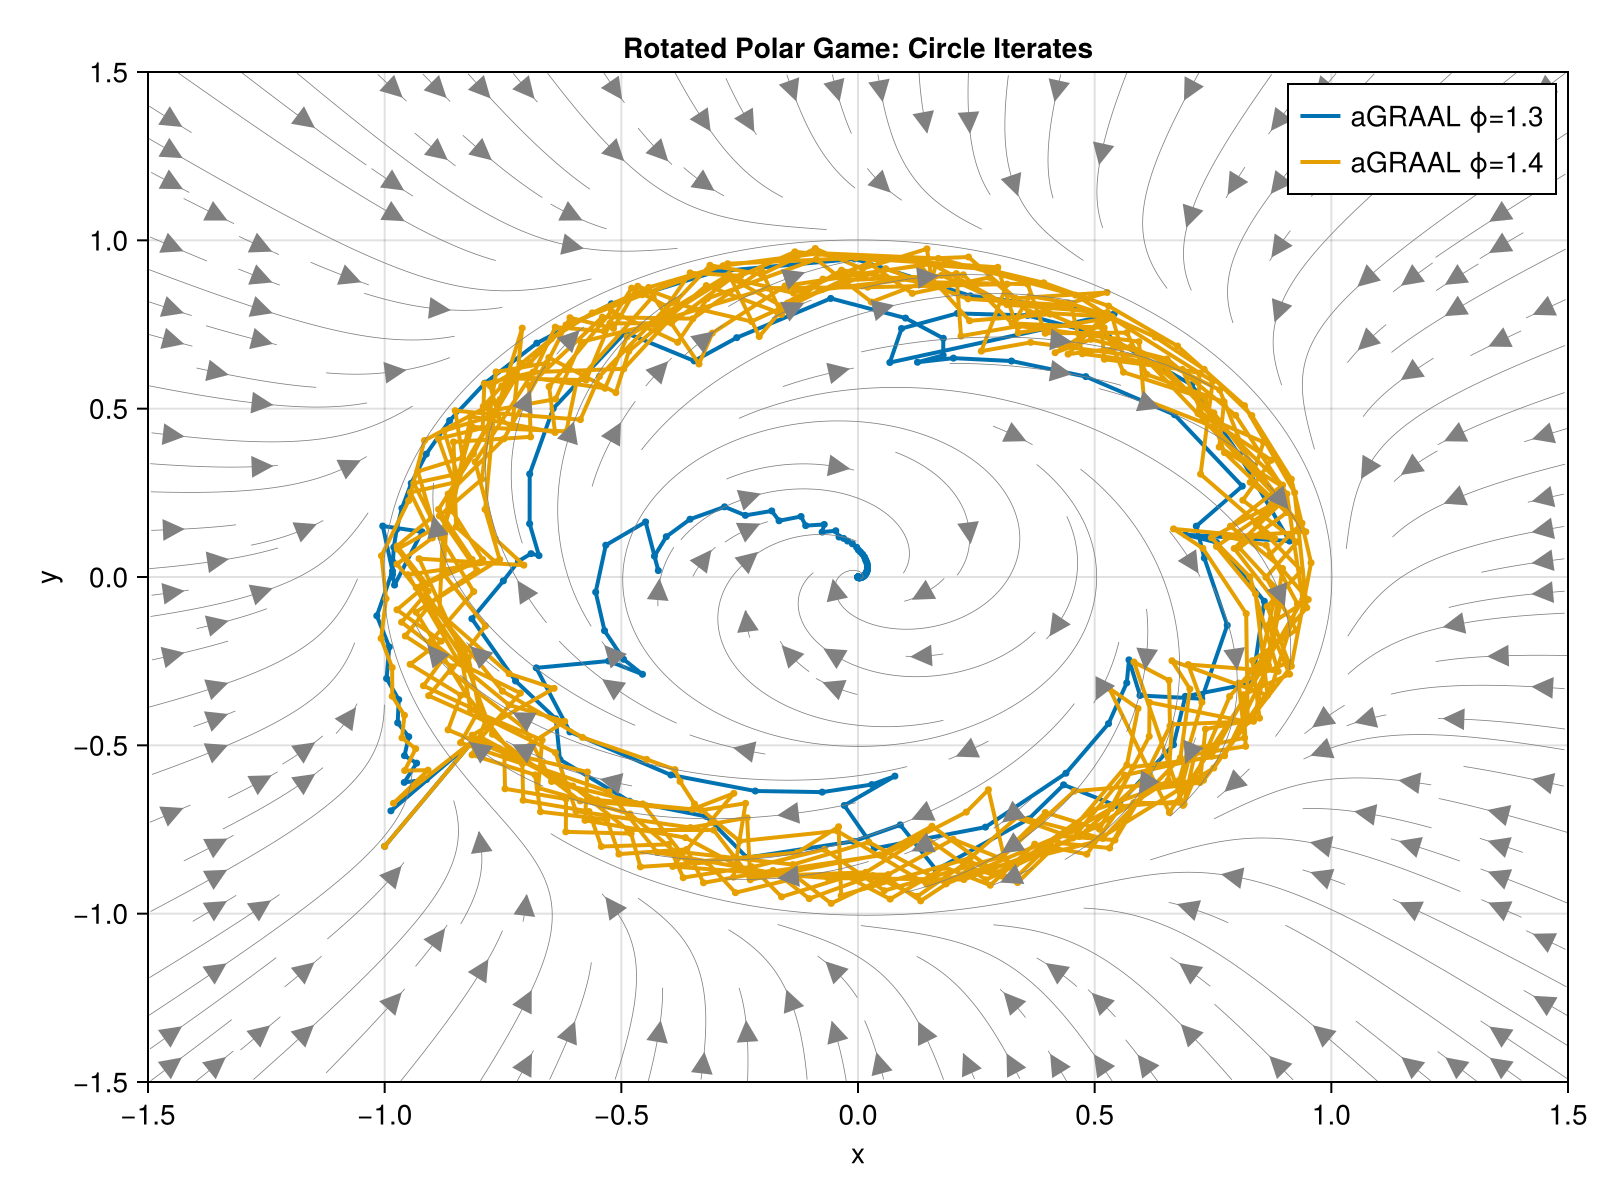

In [5]:
F, proj = polar_game()

zs1, _, _ = aGRAAL(F, proj, [-1., -0.8], φ=1.3)
zs2, _, _ = aGRAAL(F, proj, [-1., -0.8], φ=1.4)

figPolarGame = plot_iterates([(zs1, "aGRAAL ϕ=1.3"), (zs2, "aGRAAL ϕ=1.4")], F; title="Rotated Polar Game: Circle Iterates")

In [6]:
function forsaken()
    F(z) = [z[2] - 0.45 + 0.5*z[1] - 2*z[1]^3 + z[1]^5; -z[1] + 0.5*z[2] - 2*z[2]^3 + z[2]^5]
    proj(z) = z
    return F, proj
end

F, proj = forsaken()
zs1, _, _ = aGRAAL(F, proj, [0.5, 0.5]; φ=1.4, max_iter=200)
zs2, _, _ = aGRAAL(F, proj, [0.5, 0.5]; φ=1.5, max_iter=200)


figForsaken= plot_iterates([(zs1, "aGRAAL ϕ=1.4"), (zs2, "aGRAAL ϕ=1.5")], F;title="Rotated Forsaken: Circle Iterates")

CairoMakie.Screen{IMAGE}
